## 1) Transformations
### Rotation, translation and skew are useful operations for matching, tracking, and data augmentation.

##### A) Write a function that takes as input an image I, rotates it by an angle θ1 and horizontally skews it by an angle, θ2. 
##### Write the matrix formulation for image rotation R(.) and skewing S(.). 
##### Define all the variables. 
##### Note that the origin of the coordinate system of the programming environment you use might be different from the one shown in the lectures. 

In [ ]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

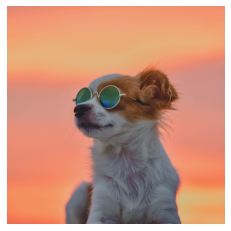

In [ ]:
#reading in and showing an image
img = cv2.imread("dog.jpg")
#conveting colour channels
img = img[:,:,::-1]
plt.axis('off')
plt.imshow(img)

In [ ]:
#printing the matrix shape & entire matrix
print('Original Image Size:', img.shape)
#resizing to make math a little easier for myself
img = cv2.resize(img, (250,250))
print('Resized Image Size:', img.shape)

print(img)

Original Image Size: (3000, 3000, 3)
Resized Image Size: (250, 250, 3)
[[[221 134 114]
  [222 135 115]
  [222 135 115]
  ...
  [244 141 110]
  [243 140 109]
  [243 140 109]]

 [[225 134 115]
  [225 134 115]
  [225 134 115]
  ...
  [244 141 110]
  [244 141 110]
  [244 141 110]]

 [[225 134 115]
  [225 134 115]
  [225 134 115]
  ...
  [244 141 110]
  [244 141 110]
  [244 141 110]]

 ...

 [[229 111  83]
  [233 113  85]
  [231 112  83]
  ...
  [233 169 108]
  [234 168 108]
  [236 167 108]]

 [[229 111  83]
  [230 110  85]
  [230 111  81]
  ...
  [234 168 108]
  [236 167 108]
  [236 168 108]]

 [[228 110  82]
  [229 109  82]
  [229 109  82]
  ...
  [233 167 107]
  [235 166 107]
  [234 165 106]]]


In [ ]:
#defining variables for image manipulation

#setting the angle we want to rotate the image by (degrees)
angleRotate = 25
#setting the angle we want to skew the image by (degrees)
angleSkew = 15

#defining the reoccuring variables so we can convert degrees to radians & maniplate matricies
angRotate = math.radians(angleRotate)
angSkew = math.radians(angleSkew)

#creating an empty matrix to fix the rotated image to 
rotateImg = np.zeros(img.shape)
skewImg = np.uint8(np.zeros(img.shape))

#finding the centre point coordinates of the image to manipulate
#dividing the shape height by 2 for the x coordinate
xMiddle = rotateImg.shape[0]//2
#dividing the shape width by 2 for the y coordinate
yMiddle = rotateImg.shape[1]//2

print('midpoint coordiantes:',xMiddle,yMiddle)

midpoint coordiantes: 125 125


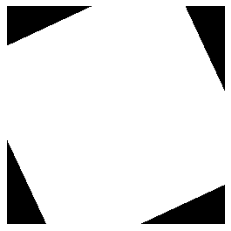

In [ ]:
#to rotate an image we need to map it to a matrix and multiply that matrix by a rotation martix (using sin & cos)

#create a for loop to go through each element in each row and each element in each column and multiply it by the rotation matrix specified by the angRotate variable
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        #multiplying the coordinates by the rotation matrix
        x = (i - xMiddle) * math.cos(angRotate) + (j-yMiddle) * math.sin(angRotate)
        y = -(i - xMiddle) * math.sin(angRotate) + (j-yMiddle) * math.cos(angRotate)
        
        #cleaning up values and adding them to the midpoint to create new position 
        x = round(x) + yMiddle
        y = round(y) + xMiddle
        
        #checking to make sure that new x,y coordinates exist and populating the rotatedImg matrix
        if x >= 0 and y >= 0 and x<img.shape[0] and y<img.shape[1]:
            rotateImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(rotateImg[:,:,::-1])

#this failed to complete the task as the image is empty

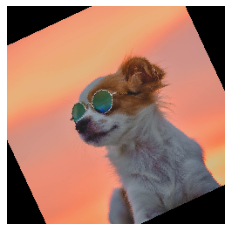

In [ ]:
#attempt 2

#we reciueved the following error message:
#'Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).'

#adding uint8 to allow the array to represent the image with 3 colour channels
rotImage = np.uint8(np.zeros(img.shape))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        
        #multiplying the coordinates by the rotation matrix
        x = (i - xMiddle) * math.cos(angRotate) + (j-yMiddle) * math.sin(angRotate)
        y = -(i - xMiddle) * math.sin(angRotate) + (j-yMiddle) * math.cos(angRotate)
        
        #cleaning up values and adding them to the midpoint to create new position 
        x = round(x) + yMiddle
        y = round(y) + xMiddle
        
        #checking to make sure that new x,y coordinates exist and populating the rotatedImg matrix
        if x >= 0 and y >= 0 and x<img.shape[0] and y<img.shape[1]:
            rotImage[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(rotImage)

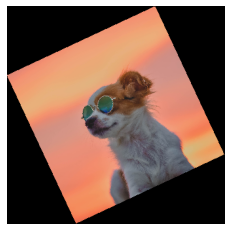

In [ ]:
#attempt 3

#the image is being rotated, BUT it is also being cropped
#we need to adjust the height&width variables to take into account the new height&width of the rotated image

#finding the height and weight of the new image
heightOfRotatedImage = round(abs(img.shape[0] * math.cos(angRotate))) + round(abs(img.shape[1] * math.sin(angRotate)))
widthOfRotatedImage = round(abs(img.shape[1] * math.cos(angRotate))) + round(abs(img.shape[0] * math.sin(angRotate)))

#adding uint8 to allow the array to represent the image with 3 colour channels
rotImg = np.uint8(np.zeros((heightOfRotatedImage, widthOfRotatedImage, img.shape[2])))
    
#finding the centre point coordinates of the new image after rotation
xRotateMiddle = widthOfRotatedImage//2
yRotateMiddle = heightOfRotatedImage//2

for i in range(rotImg.shape[0]):
  for j in range(rotImg.shape[1]):
    x= (i - xRotateMiddle) * math.cos(angRotate) + (j - xRotateMiddle) * math.sin(angRotate)
    y= -(i - xRotateMiddle) * math.sin(angRotate) + (j - yRotateMiddle) * math.cos(angRotate)

    x=round(x) + yMiddle
    y=round(y) + xMiddle

    if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
      rotImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(rotImg)


In [ ]:
#funtion to rotate image

def ICV_imageRotate(img, angRotate):
    
    #defining the reoccuring variables so we can convert degrees to radians & maniplate matricies based on the input angles
    degreeOfRotation = math.radians(angRotate)
    
    #ADD THIS TO THE REPORT AS 'WHAT I COULD HAVE DONE'
    #the function automatically rotates the image counter clickwise, so this line will modify it to make the function always rotate clockwise                                                                                            
    angRotateClockwise = degreeOfRotation * (-1)
    
    #calculating what the height of the image will be once it has been rotated, based on the degree of rotation input
    heightOfRotatedImage = round(abs(img.shape[0] * math.cos(angRotateClockwise))) + round(abs(img.shape[1] * math.sin(angRotateClockwise)))
    #calculating what the width of the image will be once it has been rotated, based on the degree of rotation input
    widthOfRotatedImage = round(abs(img.shape[1] * math.cos(angRotateClockwise))) + round(abs(img.shape[0] * math.sin(angRotateClockwise)))
    #creating an empty matricies to fix the manipulated images to (that can represent the colour channels)
    rotImg = np.uint8(np.zeros((heightOfRotatedImage, widthOfRotatedImage, img.shape[2])))
    
    #finding the centre point coordinates of the original image to manipulate
    #dividing the shape height by 2 for the x coordinate
    xMiddle = img.shape[1]//2
    #dividing the shape width by 2 for the y coordinate
    yMiddle = img.shape[0]//2

    #finding the centre point coordinated of the new image size once it has been rotated
    #dividing the 'widthOfRotatedImage' variable by 2 (as it contains the shape of the rotated image) for the x coordinate
    xRotateMiddle = widthOfRotatedImage//2
    #dividing the 'widthOfRotatedImage' variable by 2 (as it contains the shape of the rotated image) for the x coordinate
    yRotateMiddle = heightOfRotatedImage//2
    
    #forloop to rotate the image by input angle
    for i in range(rotImg.shape[0]):
        for j in range(rotImg.shape[1]):

            #multiplying the coordinates by the rotation matrix
            x = (i - xRotateMiddle) * math.cos(angRotateClockwise) + (j - xRotateMiddle) * math.sin(angRotateClockwise)
            y = -(i - xRotateMiddle) * math.sin(angRotateClockwise) + (j - yRotateMiddle) * math.cos(angRotateClockwise)

            #cleaning up values and adding them to the midpoint to create new position 
            x = round(x) + yMiddle
            y = round(y) + xMiddle

            #checking to make sure that new x,y coordinates exist and populating the rotatedImg matrix
            if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
              rotImg[i,j,:] = img[x,y,:]
    #return the rotated image as an output
    return rotImg

Here is the Original Image:


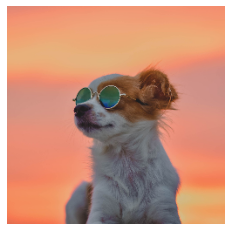

In [ ]:
#image = cv2.imread("dog.jpg")
print("Here is the Original Image:")
plt.axis('off')
plt.imshow(img)

Here is the Rotated Image:


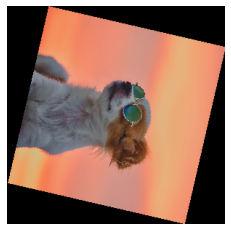

In [ ]:
newRotation = ICV_imageRotate(img, 103)
print("Here is the Rotated Image:")
plt.axis('off')
plt.imshow(newRotation)

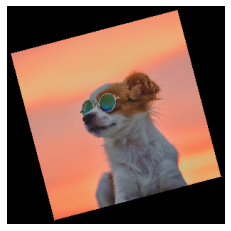

In [ ]:
#new attempt 1
#finding the height and weight of the new image
heightOfSkewedImage = round(abs(img.shape[0] * math.cos(angSkew))) + round(abs(img.shape[1] * math.sin(angSkew)))
widthOfSkewedImage = round(abs(img.shape[1] * math.cos(angSkew))) + round(abs(img.shape[0] * math.sin(angSkew)))

#adding uint8 to allow the array to represent the image with 3 colour channels
skewImg = np.uint8(np.zeros((heightOfSkewedImage, widthOfSkewedImage, img.shape[2])))
    
#finding the centre point coordinates of the new image after rotation
xRotateMiddle = widthOfSkewedImage//2
yRotateMiddle = heightOfSkewedImage//2

for i in range(skewImg.shape[0]):
  for j in range(skewImg.shape[1]):
    x= (i - xRotateMiddle) * 1 + (j - xRotateMiddle) * angSkew
    y= -(i - xRotateMiddle) * angSkew + (j - yRotateMiddle) * 1

    x=round(x) + yMiddle
    y=round(y) + xMiddle

    if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
      skewImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(skewImg)

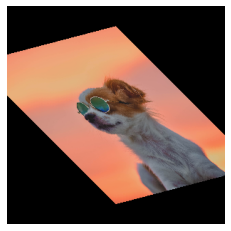

In [ ]:
#new attempt 2
#finding the height and weight of the new image
heightOfSkewedImage = round(abs(img.shape[0] * math.cos(angSkew))) + round(abs(img.shape[1] * math.sin(angSkew)))
widthOfSkewedImage = round(abs(img.shape[1] * math.cos(angSkew))) + round(abs(img.shape[0] * math.sin(angSkew)))

#adding uint8 to allow the array to represent the image with 3 colour channels
skewImg = np.uint8(np.zeros((heightOfSkewedImage, widthOfSkewedImage, img.shape[2])))
    
#finding the centre point coordinates of the new image after rotation
xRotateMiddle = widthOfSkewedImage//2
yRotateMiddle = heightOfSkewedImage//2

for i in range(skewImg.shape[0]):
  for j in range(skewImg.shape[1]):
    #multiplying the coordinates by the shear matrix
    x = ((i - xRotateMiddle) * 1) + ((j - yRotateMiddle) * angSkew)
    #we only want to skew the image on the x axis - so here, y should remain the same
    y = (-(i - xRotateMiddle) * 1) + ((j - yRotateMiddle) * 1)

    x=round(x) + yMiddle
    y=round(y) + xMiddle

    if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
      skewImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(skewImg)

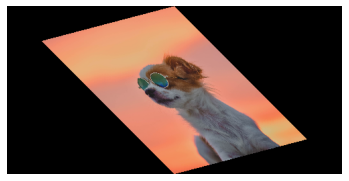

In [ ]:
#new attempt 3
#finding the height and weight of the new image
heightOfSkewedImage = img.shape[0]
widthOfSkewedImage =  round(abs(img.shape[1] * 1)) + round(abs(img.shape[0] * 1)) 

#adding uint8 to allow the array to represent the image with 3 colour channels
skewImg = np.uint8(np.zeros((heightOfSkewedImage, widthOfSkewedImage, img.shape[2])))
    
#finding the centre point coordinates of the new image after skew
xSkewMiddle = img.shape[0] //2
ySkewMiddle = img.shape[1]

for i in range(skewImg.shape[0]):
  for j in range(skewImg.shape[1]):
    #multiplying the coordinates by the shear matrix
    x = ((i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * angSkew)
    #we only want to skew the image on the x axis - so here, y should remain the same
    y = (-(i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * 1)

    x=round(x) + yMiddle
    y=round(y) + xMiddle

    if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
      skewImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(skewImg)

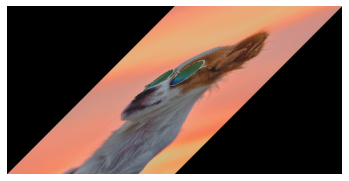

In [ ]:
#new attempt 4
#mny skew starts to rotaet teh image at a certain point which is not what i want
#this may be down to the fact that i am manipluating both the x and y axis
#however because im trying to skew horizontally, where the y axis should not change, i only need to manipulate one axes
#attepmpting to fix problem but only applying calculations to one axis
#finding the height and weight of the new image
heightOfSkewedImage = img.shape[0]
widthOfSkewedImage =  round(abs(img.shape[1] * 1)) + round(abs(img.shape[0] * 1)) 

#adding uint8 to allow the array to represent the image with 3 colour channels
skewImg = np.uint8(np.zeros((heightOfSkewedImage, widthOfSkewedImage, img.shape[2])))
    
#finding the centre point coordinates of the new image after skew
xSkewMiddle = img.shape[0] //2
ySkewMiddle = img.shape[1] 

for i in range(skewImg.shape[0]):
  for j in range(skewImg.shape[1]):
    #multiplying the coordinates by the shear matrix
    x = ((i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * angSkew)
    #we only want to skew the image on the x axis - so here, y should remain the same
    y = ((i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * 1)

    x=round(x) + yMiddle
    y=round(y) + xMiddle

    if (x>=0 and y>=0 and x<img.shape[0] and  y<img.shape[1]):
      skewImg[i,j,:] = img[x,y,:]

plt.axis('off')
plt.imshow(skewImg)

#turns out all i had to do was remove a minus from

In [ ]:
#funtion to skew image

def ICV_imageSkew(img, angSkew):
    
    #img = img[:,:,::-1]
    #defining the reoccuring variables so we can convert degrees to radians & maniplate matricies based on the input angle
    angleSkew = math.radians(angSkew)

    #finding the weight of the new, skewed image & setting the height of the new, skewed image (which should be the same as the original image)
    heightOfSkewedImage = img.shape[0]
    widthOfSkewedImage =  round(abs(img.shape[1] * 1)) + round(abs(img.shape[0] * 1)) 

    #creating an empty matricies to fix the manipulated images to (that can represent the colour channels)
    skewImg = np.uint8(np.zeros((heightOfSkewedImage, widthOfSkewedImage, img.shape[2])))
    
    #finding the centre point coordinates of the original image to manipulate
    #dividing the shape height by 2 for the x coordinate
    xMiddle = img.shape[1]//2
    #dividing the shape width by 2 for the y coordinate
    yMiddle = img.shape[0]//2

    #finding the centre point coordinates of the image to manipulate
    #dividing the shape height by 2 for the x coordinate
    xSkewMiddle = img.shape[0] //2
    #getting shape width for the y coordiante
    ySkewMiddle = img.shape[1]
    
    #forloop to skew image by input angle
    for i in range(skewImg.shape[0]):
        for j in range(skewImg.shape[1]):

            #multiplying the coordinates by the shear matrix
            x = ((i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * angleSkew)
            #we only want to skew the image on the x axis - so here, y should remain the same
            y = ((i - xSkewMiddle) * 1) + ((j - ySkewMiddle) * 1)

            #cleaning up values and adding them to the midpoint to create new image skew 
            x = round(x) + xMiddle
            y = round(y) + yMiddle

            #checking to make sure that new x,y coordinates exist and populating the skewImg matrix
            if (x >= 0 and y >= 0 and x < img.shape[0] and y < img.shape[0]):
                skewImg[i,j,:] = img[x,y,:]
            
    return skewImg

Here is the Original Image:


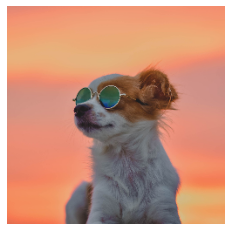

In [ ]:
#image = cv2.imread("dog.jpg")
print("Here is the Original Image:")
plt.axis('off')
plt.imshow(img)

Here is the Skewed Image:


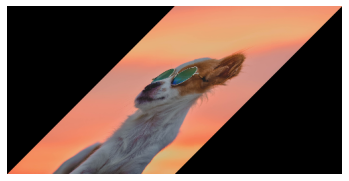

In [ ]:
newSkew = ICV_imageSkew(img, 1)
print("Here is the Skewed Image:")
plt.axis('off')
plt.imshow(newSkew)

##### B) Create an image that contains your name written in Arial, point 72, capital letters. 
##### Rotate clockwise the image you created by 30, 60, 120 and -50 degrees. 
##### Skew the same image by 10, 40 and 60 degrees. 
##### Complete the process so that all the pixels have a value. 
##### Discuss in the report the advantages and disadvantages of different approaches.

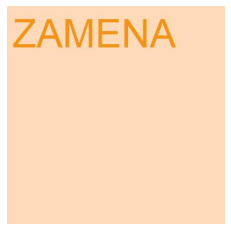

In [ ]:
#creating the image

#import library to create an image with text
from PIL import Image, ImageDraw, ImageFont

#create image dimensions
width = 400
height = 400

#assign a message to be displayed
text = "ZAMENA"

#set font type & size
font = ImageFont.truetype('arial.ttf', 72)

#creating the image base
box = Image.new('RGB', (width, height), color = 'peachpuff')

#drawing the image out
drawBox = ImageDraw.Draw(box)

#writing name in box and setting font colour
drawBox.text((10, 10 ), text, font = font, fill = (245, 147, 20))

#saving the image for later use
box.save('name.jpg')

#reading in and showing th
name = cv2.imread('name.jpg')
name = name[:,:,::-1]
plt.axis('off')
plt.imshow(name)

Here is the Image Rotated 30 Degrees Clockwise:


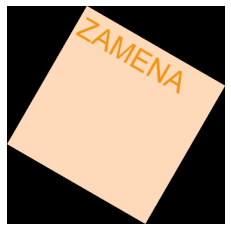

In [ ]:
#rotate the image clockwise 30 degrees
newRotation = ICV_imageRotate(name, 30)
print("Here is the Image Rotated 30 Degrees Clockwise:")
plt.axis('off')
plt.imshow(newRotation)

Here is the Image Rotated 60 Degrees Clockwise:


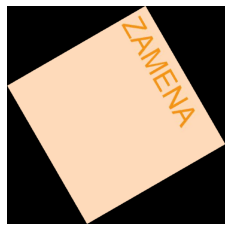

In [ ]:
#rotate the image clockwise 60 degrees
newRotation = ICV_imageRotate(name, 60)
print("Here is the Image Rotated 60 Degrees Clockwise:")
plt.axis('off')
plt.imshow(newRotation)

Here is the Image Rotated 120 Degrees Clockwise:


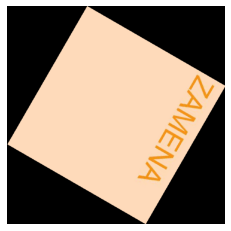

In [ ]:
#rotate the image clockwise 120 degrees
newRotation = ICV_imageRotate(name, 120)
print("Here is the Image Rotated 120 Degrees Clockwise:")
plt.axis('off')
plt.imshow(newRotation)

Here is the Image Rotated 50 Degrees Counter-Clockwise:


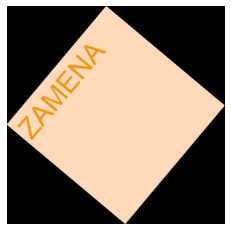

In [ ]:
#rotate the image clockwise -50 degrees
newRotation = ICV_imageRotate(name, -50)
print("Here is the Image Rotated 50 Degrees Counter-Clockwise:")
plt.axis('off')
plt.imshow(newRotation)

Here is the Image Skewed 10 Degrees:


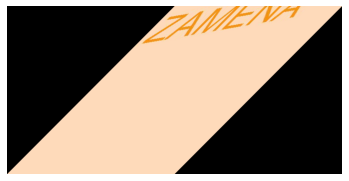

In [ ]:
newSkew = ICV_imageSkew(name, 10)
print("Here is the Image Skewed 10 Degrees:")
plt.axis('off')
plt.imshow(newSkew)

Here is the Image Skewed 40 Degrees:


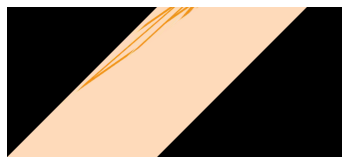

In [ ]:
newSkew = ICV_imageSkew(name, 40)
print("Here is the Image Skewed 40 Degrees:")
plt.axis('off')
plt.imshow(newSkew)

Here is the Image Skewed 60 Degrees:


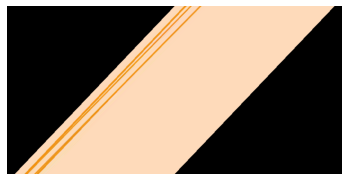

In [ ]:
newSkew = ICV_imageSkew(name, 60)
print("Here is the Image Skewed 60 Degrees:")
plt.axis('off')
plt.imshow(newSkew)

##### C) Analyse the results when you change the order of the two operators: R(S(I)) and S(R(I)).
###### i) Rotate the image by θ1 = 20 clockwise and then skew the result by θ2 = 50.
###### ii) Skew the image by θ2 = 50 and then rotate the result by θ1 = 20 clockwise.
##### Are the results of (i) and (ii) the same? Why?


Here is the original image:


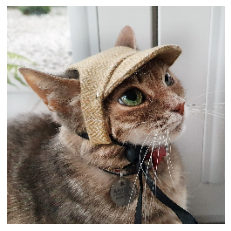

In [ ]:
cat = cv2.imread("cat.jpg")
cat = cat[:,:,::-1]
cat = cv2.resize(cat, (250,250))
print("Here is the original image:")
plt.axis('off')
plt.imshow(cat)

Here is the Image has been Rotated AND THEN Skewed:


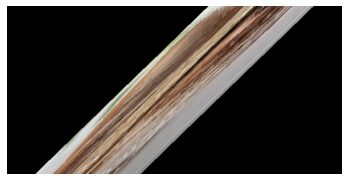

In [ ]:
#rotating a new image 20 degrees clockwise:
catRotate = ICV_imageRotate(cat, 20)
#skewing a the rotated image 50 degrees:
catRotateSkew = ICV_imageSkew(catRotate, 50)

print("Here is the Image has been Rotated AND THEN Skewed:")
plt.axis('off')
plt.imshow(catRotateSkew)

Here is the Image has been Skewed AND THEN Rotated:


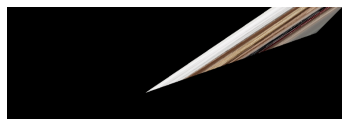

In [ ]:
#skewing a new image 50 degrees:
catSkew = ICV_imageSkew(cat, 50)

#rotating the skewed image 20 degrees clockwise:
catSkewRotate = ICV_imageSkew(catSkew, 20)

print("Here is the Image has been Skewed AND THEN Rotated:")
plt.axis('off')
plt.imshow(catSkewRotate)